## Advanced Lane Lines Finding -- Project 2

### The Goal of this Project
The goal of this project is to write a software pipeline to identify the lane boundaries in a video from a front-facing camera on a car. The camera calibration images, test road images, and project videos are provided
____
### Steps:
* Calibrate the camera
* Undistort the image 
* Convert video into perspective view
* Explore Color/Gradient thresholds to convert image into binary with maximum lane information
* Detect lane lines in each video frame
* Determin the lane curvature
* Overlay back to the original image
____

## Step 1: Camera Calibration
* First to calculate the value of 'objpoints' and imgpoints
* then the value of ret, mtx, dist, rvecs, tvecs are calculated

### The following is to calculate the value of 'objpoints' and 'imgpoints'

In [1]:
# load the related packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
import glob

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from moviepy.editor import VideoFileClip,clips_array
from IPython.display import HTML

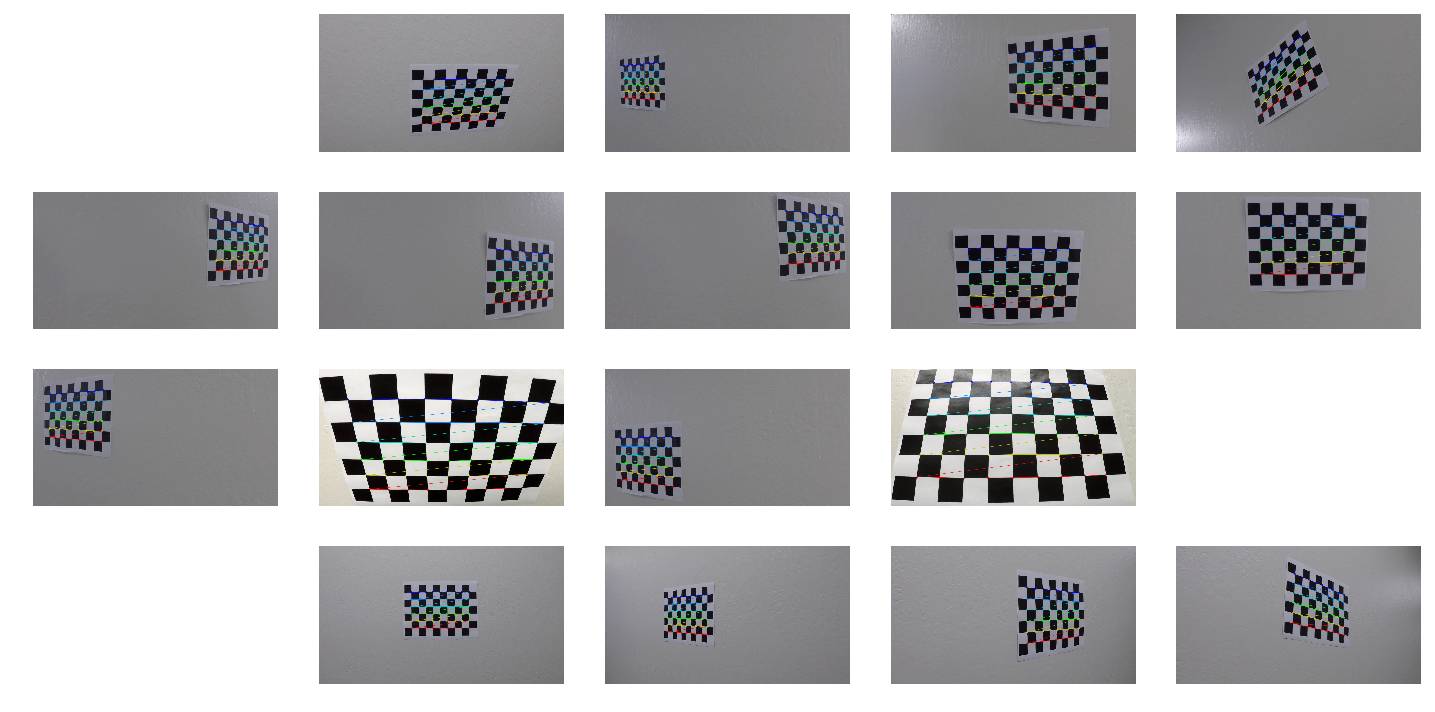

In [2]:
%matplotlib inline

#calculate objpoints and imgpoints
objpoints = []
imgpoints = []
#define the chess board corners
nx, ny = 9, 6

objp = np.zeros((9 * 6, 3), np.float32 )
objp[:, :2] = np.mgrid[0: nx, 0: ny].T.reshape(-1,2)

img_names = glob.glob('camera_cal/*.jpg')
fig, *axs = plt.subplots(4, 5, figsize = (20,10))
fig.tight_layout()
axs = np.ravel(axs)
for idx, img_name in enumerate(img_names):
    img = mpimg.imread(img_name)
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)
    if ret == True:
        objpoints.append(objp)
        imgpoints.append(corners)
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
        #cv2.imshow(img_name,img)
        #cv2.waitKey(1000)
        axs[idx].imshow(img)
    axs[idx].axis('off')

'calibration1.jpg', 'calibration4.jpg' and 'calibration5.jpg' didn't show up because they don't show 4 * 9 corners

###  The following cell is to calculate ret, mtx, dist, rvecs, tvecs

not exists


Text(0.5,1,'Undistorted')

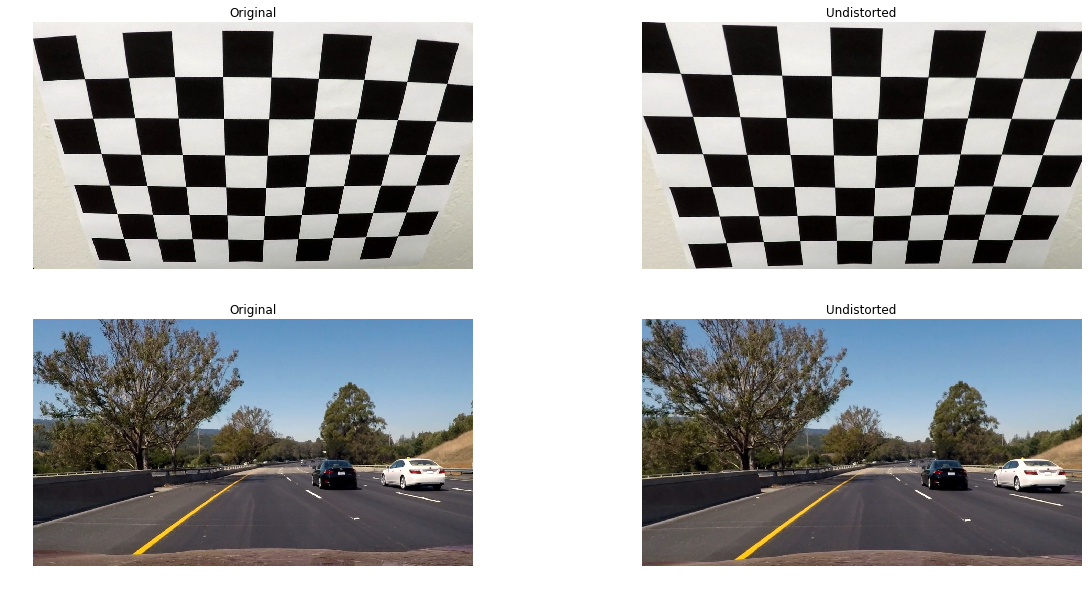

In [3]:
import os
if not os.path.exists('output_videos'):
    print('not exists')
    os.mkdir('output_videos')

test_img = mpimg.imread( glob.glob('camera_cal/calibration2.jpg')[0])
img_size = (test_img.shape[1], test_img.shape[0])

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img_size, None, None)
undist = cv2.undistort(test_img, mtx, dist, None, mtx)
mpimg.imsave('output_images/calibrated2.jpg',undist)
fig, *axs = plt.subplots(2,2, figsize = (20,10))
axs = np.ravel(axs)
axs[0].imshow(test_img)
axs[0].axis('off')
axs[0].set_title('Original')
axs[1].imshow(undist)
axs[1].axis('off')
axs[1].set_title('Undistorted')

test_img = mpimg.imread( glob.glob('test_images/test6.jpg')[0])
img_size = (test_img.shape[1], test_img.shape[0])
undist = cv2.undistort(test_img, mtx, dist, None, mtx)
mpimg.imsave('output_images/calibrated_test6.jpg',undist)
axs = np.ravel(axs)
axs[2].imshow(test_img)
axs[2].axis('off')
axs[2].set_title('Original')
axs[3].imshow(undist)
axs[3].axis('off')
axs[3].set_title('Undistorted')

## Step 2 perspective view
### The following cell is to define src and dst points,then calculate M of warp algorithm

Text(0.5,1,'Warped image with dest. points drawn')

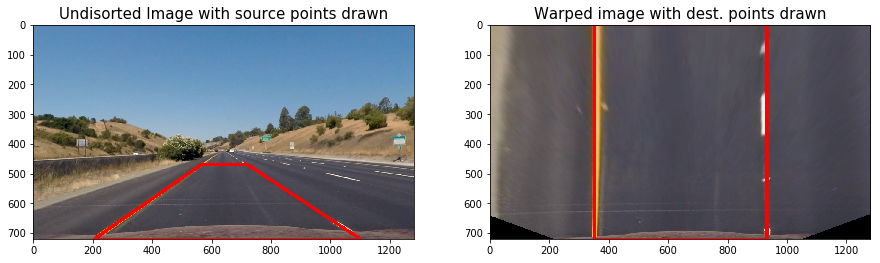

In [4]:
#%matplotlib qt 

test_img = mpimg.imread( glob.glob('test_images/straight_lines1.jpg')[0])
undist_img = cv2.undistort(test_img, mtx, dist, None, mtx)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

#define src points and draw those points onto undistored image
src = np.float32([[205,720],[565,470],[720,470],[1100,720]])
A, B, C, D= tuple(src[0]), tuple(src[1]), tuple(src[2]), tuple(src[3])
undist_img_tmp = np.copy(undist_img)
cv2.line(undist_img_tmp, A, B, [255,0,0], 10)
cv2.line(undist_img_tmp, B, C, [255,0,0], 10)
cv2.line(undist_img_tmp, C, D, [255,0,0], 10)
cv2.line(undist_img_tmp, D, A, [255,0,0], 10)
mpimg.imsave('output_images/source_points_drawn.jpg',undist_img_tmp)
ax1.imshow(undist_img_tmp)
ax1.set_title('Undisorted Image with source points drawn', fontsize=15)
h, w = img.shape[:2]

#define dst points and draw those points onto warped image
dst = np.float32([[350, 720],[350, 0],  [w-350, 0],    [w-350, 720]])
A, B, C, D= tuple(dst[0]), tuple(dst[1]), tuple(dst[2]), tuple(dst[3])

img_size = (undist_img.shape[1], undist_img.shape[0])
M = cv2.getPerspectiveTransform(src, dst)
Minv = cv2.getPerspectiveTransform(dst, src)
warped = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)

cv2.line(warped, A, B, [255,0,0], 10)
cv2.line(warped, B, C, [255,0,0], 10)
cv2.line(warped, C, D, [255,0,0], 10)
cv2.line(warped, D, A, [255,0,0], 10)
mpimg.imsave('output_images/dest_points_drawn.jpg',warped)
ax2.imshow(warped)
ax2.set_title('Warped image with dest. points drawn', fontsize=15)



### The following cell is to verify the perspective transform and generate a bird eye view video

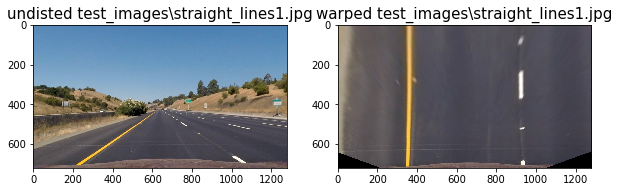

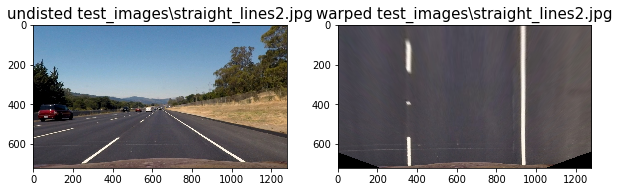

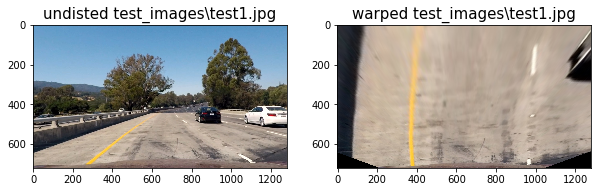

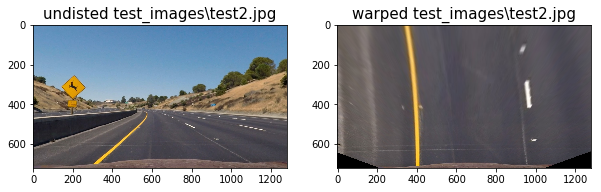

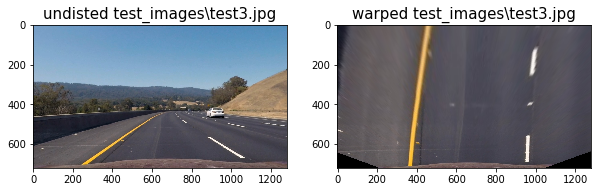

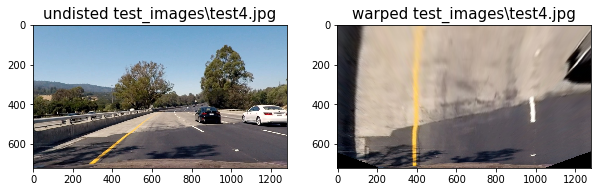

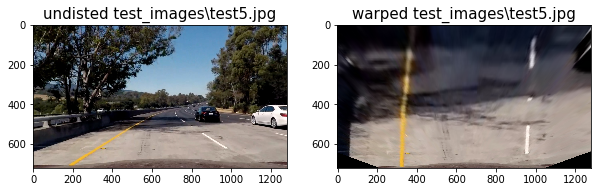

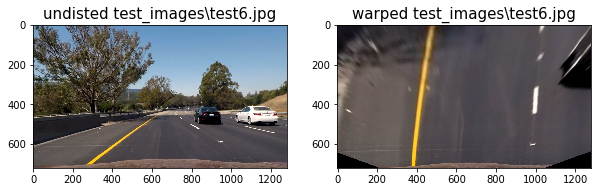

In [5]:
test_imgs = glob.glob('test_images/*.jpg')

for idx, img_name in enumerate(test_imgs):
    test_img = mpimg.imread(img_name)
    undist_img= cv2.undistort(test_img, mtx, dist, None, mtx)
    
    warped = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    mpimg.imsave('output_images/'+'undist_' +img_name.split('\\')[-1], undist_img) 
    mpimg.imsave('output_images/'+'warped_' +img_name.split('\\')[-1], warped)    
    
    fig, *axs = plt.subplots( 1,2, figsize=(10, 5))
    axs = np.ravel(axs)
    axs[0].imshow(undist_img)
    axs[0].set_title('undisted '+img_name.split('/')[-1], fontsize=15)
    axs[1].imshow(warped)
    axs[1].set_title('warped '+img_name.split('/')[-1], fontsize=15)



In [6]:
def process_image(test_img):
    undist_img= cv2.undistort(test_img, mtx, dist, None, mtx)
    warped = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)    
    return warped#np.concatenate((undist_img,warped),axis=-1)

#generate warped view of the video's
white_output = 'output_videos/warped_project_video.mp4'
clip1 = VideoFileClip("project_video.mp4")
white_clip = clip1.fl_image(process_image)
#final_clip = clips_array([clip1, white_clip])
%time white_clip.write_videofile(white_output, audio=False)
#%time final_clip.write_videofile('output_videos/warped_video.mp4',audio=False)

[MoviePy] >>>> Building video output_videos/warped_project_video.mp4
[MoviePy] Writing video output_videos/warped_project_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [00:25<00:00, 48.66it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/warped_project_video.mp4 

Wall time: 26.3 s


In [7]:
#combine the original video and warped view of the video together
clip1 = VideoFileClip("project_video.mp4")
clip2 = VideoFileClip('output_videos/warped_project_video.mp4')
final_clip = clips_array([[clip1, clip2]])
%time final_clip.write_videofile('output_videos/project_and_warped_video.mp4',audio=False)

[MoviePy] >>>> Building video output_videos/project_and_warped_video.mp4
[MoviePy] Writing video output_videos/project_and_warped_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [00:44<00:00, 28.05it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/project_and_warped_video.mp4 

Wall time: 45.7 s


In [8]:
white_output='output_videos/project_and_warped_video.mp4'
HTML("""
<video width="480" height="270" controls>
  <source src="{0}">
</video>
""".format(white_output))

## Step 3.1: Color Space Exploring
    RGB, HLS, HSV and LUV


---------------------------------------------------------
### Exploring RGB color space
* The following code is to check which channel in RGB color space can extract lane line information
* For bright pictures like test1.jpg or test4.jpg, or pictures with shadow like test5.jpg, it is hard to extract lane lines no matter it is red, green or blue channel
* Overall, the red channel gives more clear lane information
------------------------------------------------------------------------
#### Observations of RGB color space:
| images  | Red(215,255)   | Green(195,255)   | Blue(60,210)   | Notes |
|-------- |--------------|--------------|--------------|
|straigh_line1.jpg| <font color=red>__$\checkmark$__</font>| <font color=red>__$\checkmark$__</font>|  | |
|straigh_line2.jpg| <font color=red>__$\checkmark$__</font>| <font color=red>__$\checkmark$__</font>|  | |
|test1.jpg| <font color=red>__$\checkmark$__</font>|  |  | bright picture|
|test2.jpg| <font color=red>__$\checkmark$__</font>| <font color=red>__$\checkmark$__</font>|  ||
|test3.jpg| <font color=red>__$\checkmark$__</font>| <font color=red>__$\checkmark$__</font>| ||
|test4.jpg| <font color=red>__$\checkmark$__</font>| |  |bright picture|
|test5.jpg|  |  |   | with shadow|
|test6.jpg| <font color=red>__$\checkmark$__</font>|  |   ||


In [9]:
#convert image into red, green, blue, then pick different threshold
# for bright image like test1.jpg, thresh_R_low = 215
def RGB_split(thresh_R_low = 215,thresh_R_high = 255,\
                  thresh_G_low = 195,thresh_G_high = 255,\
                  thresh_B_low = 60, thresh_B_high = 210):

    fig, *axs = plt.subplots(2*len(test_img_names),3,figsize=(10,5 * len(test_img_names)))
    axs = np.ravel(axs).reshape(-1,3)
    fig.tight_layout()

    for i, img_name in enumerate(test_img_names):
        name = img_name.split('_')[-1].split('.')[0]
        test_imgs = mpimg.imread(img_name)
        channel = test_imgs[:,:,0]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_R_low)&(channel<thresh_R_high)]=1 
        axs[2*i][0].imshow(channel,cmap='gray')
        axs[2*i][0].set_title(name+' Red',fontsize=10)    
        axs[2*i][0].axis('off')
        axs[2*i+1][0].imshow(binary,cmap='gray')
        axs[2*i+1][0].set_title(name+' Red Binary',fontsize=10) 
        axs[2*i+1][0].axis('off')
        channel = test_imgs[:,:,1]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_G_low)&(channel<thresh_G_high)]=1
        axs[2*i][1].imshow(channel,cmap='gray')
        axs[2*i][1].set_title(name+' Green',fontsize=10)    
        axs[2*i][1].axis('off')        
        axs[2*i+1][1].imshow(binary,cmap='gray')
        axs[2*i+1][1].set_title(name+' Green Binary',fontsize=10)
        axs[2*i+1][1].axis('off')  
        channel = test_imgs[:,:,2]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_B_low)&(channel<thresh_B_high)]=1
        axs[2*i][2].imshow(channel,cmap='gray')
        axs[2*i][2].set_title(name+' Blue',fontsize=10)    
        axs[2*i][2].axis('off')          
        axs[2*i+1][2].imshow(binary,cmap='gray')
        axs[2*i+1][2].set_title(name+' Blue Binary',fontsize=10)   
        axs[2*i+1][2].axis('off')          
 
test_img_names = glob.glob('output_images/warped_test1.jpg')


interactive_plot = interactive(RGB_split,  
                  thresh_R_low = (0,255,5),thresh_R_high = (0,255,5),\
                  thresh_G_low = (0,255,5),thresh_G_high = (0,255,5),\
                  thresh_B_low = (0,255,5),thresh_B_high = (0,255,5))
output = interactive_plot.children[-1]
#output.layout.height = '200px'
interactive_plot    

interactive(children=(IntSlider(value=215, description='thresh_R_low', max=255, step=5), IntSlider(value=255, description='thresh_R_high', max=255, step=5), IntSlider(value=195, description='thresh_G_low', max=255, step=5), IntSlider(value=255, description='thresh_G_high', max=255, step=5), IntSlider(value=60, description='thresh_B_low', max=255, step=5), IntSlider(value=210, description='thresh_B_high', max=255, step=5), Output()), _dom_classes=('widget-interact',))

---------------------------------------------------
### Exploring HLS color space
* The following code is to check which channel in HLS color space can extract lane line information
* for bright pictures like test1.jpg or test4.jpg, the S channel gives much better lane line information
* for pictures with shadow like test5.jpg, HLS color space has no good solution
* overall, L channel gives better lane infor
---------------------------------------------
#### Observations of HLS color space:
| images  | H(14,85)   | L(120,255)   | S(210,255)   | Notes |
|-------- |--------------|--------------|--------------|
|straigh_line1.jpg| | <font color=red>__$\checkmark$__</font>| | |
|straigh_line2.jpg| | <font color=red>__$\checkmark$__</font>|  | |
|test1.jpg| | |<font color=red>__$\checkmark$__</font>| bright picture|
|test2.jpg| |<font color=red>__$\checkmark$__</font>|  ||
|test3.jpg| |<font color=red>__$\checkmark$__</font>| ||
|test4.jpg| | | <font color=red>__$\checkmark$__</font> |bright picture|
|test5.jpg| | | | with shadow|
|test6.jpg| |  <font color=red>__$\checkmark$__</font>|   ||

In [10]:
#convert image into red, green, blue, then pick different threshold
def HLS_split(thresh_H_low = 14,thresh_H_high = 85,\
                  thresh_L_low = 120,thresh_L_high = 255,\
                  thresh_S_low = 210, thresh_S_high = 255):
    fig, *axs = plt.subplots(2*len(test_img_names),3,figsize=(10,5 * len(test_img_names)))
    axs = np.ravel(axs).reshape(-1,3)
    fig.tight_layout()

    for i, img_name in enumerate(test_img_names):
        name = img_name.split('_')[-1].split('.')[0]
        test_imgs = mpimg.imread(img_name)
        #into HLS
        hls = cv2.cvtColor(test_imgs, cv2.COLOR_RGB2HLS)   
        
        channel = hls[:,:,0]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_H_low)&(channel<thresh_H_high)]=1
        #binary[(channel>thresh_H_high)]=1    
        axs[2*i][0].imshow(channel,cmap='gray')
        axs[2*i][0].set_title(name+' H',fontsize=10)    
        axs[2*i][0].axis('off')
        axs[2*i+1][0].imshow(binary,cmap='gray')
        axs[2*i+1][0].set_title(name+' H Binary',fontsize=10) 
        axs[2*i+1][0].axis('off')
        channel = hls[:,:,1]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_L_low)&(channel<thresh_L_high)]=1
        axs[2*i][1].imshow(channel,cmap='gray')
        axs[2*i][1].set_title(name+' L',fontsize=10)    
        axs[2*i][1].axis('off')        
        axs[2*i+1][1].imshow(binary,cmap='gray')
        axs[2*i+1][1].set_title(name+' L Binary',fontsize=10)
        axs[2*i+1][1].axis('off')  
        channel = hls[:,:,2]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_S_low)&(channel<thresh_S_high)]=1
        axs[2*i][2].imshow(channel,cmap='gray')
        axs[2*i][2].set_title(name+' S',fontsize=10)    
        axs[2*i][2].axis('off')          
        axs[2*i+1][2].imshow(binary,cmap='gray')
        axs[2*i+1][2].set_title(name+' S Binary',fontsize=10)   
        axs[2*i+1][2].axis('off')      
   
test_img_names = glob.glob('output_images/warped_test1.jpg')
 
interactive_plot = interactive(HLS_split,  
                  thresh_H_low = (0,120,2),thresh_H_high = (0,150,2),\
                  thresh_L_low = (0,255,5),thresh_L_high = (0,255,5),\
                  thresh_S_low = (0,255,5),thresh_S_high = (0,255,5))
output = interactive_plot.children[-1]
#output.layout.height = '400px'
interactive_plot  

interactive(children=(IntSlider(value=14, description='thresh_H_low', max=120, step=2), IntSlider(value=85, description='thresh_H_high', max=150, step=2), IntSlider(value=120, description='thresh_L_low', max=255, step=5), IntSlider(value=255, description='thresh_L_high', max=255, step=5), IntSlider(value=210, description='thresh_S_low', max=255, step=5), IntSlider(value=255, description='thresh_S_high', max=255, step=5), Output()), _dom_classes=('widget-interact',))

---------------------------------------------------
### Exploring HSV color space
* The following code is to check which channel in HSV color space can extract lane line information
* for bright pictures like test1.jpg or test4.jpg, V channel gives better lane line information
* for pictures with shadow like test5.jpg, HSV color space has no good solution
* overall, V channel provides much bettern lane line information
----------------------------------------
#### Observations of HSV color space:
| images  | H(14,85)   | S(80,255)   | V(220,255)   | Notes |
|-------- |--------------|--------------|--------------|
|straigh_line1.jpg| ||<font color=red>__$\checkmark$__</font>| |
|straigh_line2.jpg| || <font color=red>__$\checkmark$__</font>| |
|test1.jpg| | | <font color=red>__$\checkmark$__</font>| bright picture|
|test2.jpg| | |<font color=red>__$\checkmark$__</font>|  ||
|test3.jpg| | |<font color=red>__$\checkmark$__</font>||
|test4.jpg| | | <font color=red>__$\checkmark$__</font> |bright picture|
|test5.jpg| | | | with shadow|
|test6.jpg| | | <font color=red>__$\checkmark$__</font>||

In [11]:
#convert image into red, green, blue, then pick different threshold

def HSV_split(thresh_H_low = 14,thresh_H_high = 85,\
                  thresh_S_low = 80,thresh_S_high = 255,\
                  thresh_V_low = 220, thresh_V_high = 255):
    fig, *axs = plt.subplots(2*len(test_img_names),3,figsize=(10,5 * len(test_img_names)))
    axs = np.ravel(axs).reshape(-1,3)
    fig.tight_layout()

    for i, img_name in enumerate(test_img_names):
        name = img_name.split('_')[-1].split('.')[0]
        test_imgs = mpimg.imread(img_name)
        #into HSV
        hsv = cv2.cvtColor(test_imgs, cv2.COLOR_RGB2HSV)      
        
        channel = hsv[:,:,0]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_H_low)&(channel<thresh_H_high)]=1
        axs[2*i][0].imshow(channel,cmap='gray')
        axs[2*i][0].set_title(name+' H',fontsize=15)    
        axs[2*i][0].axis('off')
        axs[2*i+1][0].imshow(binary,cmap='gray')
        axs[2*i+1][0].set_title(name+' H Binary',fontsize=15) 
        axs[2*i+1][0].axis('off')
        channel = hsv[:,:,1]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_S_low)&(channel<thresh_S_high)]=1
        axs[2*i][1].imshow(channel,cmap='gray')
        axs[2*i][1].set_title(name+' S',fontsize=15)    
        axs[2*i][1].axis('off')        
        axs[2*i+1][1].imshow(binary,cmap='gray')
        axs[2*i+1][1].set_title(name+' S Binary',fontsize=15)
        axs[2*i+1][1].axis('off')  
        channel = hsv[:,:,2]
        binary = np.zeros_like(channel)
        binary[(channel>thresh_V_low)&(channel<thresh_V_high)]=1
        axs[2*i][2].imshow(channel,cmap='gray')
        axs[2*i][2].set_title(name+' V',fontsize=15)    
        axs[2*i][2].axis('off')          
        axs[2*i+1][2].imshow(binary,cmap='gray')
        axs[2*i+1][2].set_title(name+' V Binary',fontsize=15)   
        axs[2*i+1][2].axis('off')      
   
test_img_names = glob.glob('output_images/warped_test1.jpg') 
interactive_plot = interactive(HSV_split,  
                  thresh_H_low = (0,255,2),thresh_H_high = (0,250,2),\
                  thresh_S_low = (0,255,5),thresh_S_high = (0,255,5),\
                  thresh_V_low = (0,255,5),thresh_V_high = (0,255,5))
output = interactive_plot.children[-1]
#output.layout.height = '400px'
interactive_plot  

interactive(children=(IntSlider(value=14, description='thresh_H_low', max=255, step=2), IntSlider(value=85, description='thresh_H_high', max=250, step=2), IntSlider(value=80, description='thresh_S_low', max=255, step=5), IntSlider(value=255, description='thresh_S_high', max=255, step=5), IntSlider(value=220, description='thresh_V_low', max=255, step=5), IntSlider(value=255, description='thresh_V_high', max=255, step=5), Output()), _dom_classes=('widget-interact',))

## Step 3.2 gradient check
-------------------------------------------------
### Exploring gradient in X, Y and Mag
* The following code is to check which direction of gradient can extract lane line information
* for bright pictures like test1.jpg or test4.jpg, gradient is hard to give better lane line information
* for pictures with shadow like test5.jpg, x-gradient gives much better lane line information
* overall, x-gradient provides much bettern lane line information 
----------------------------------------
#### Observations of gradient:
| images  | X(14,100)   | Y(0,255)   | ABS(0,255)   | Notes |
|-------- |--------------|--------------|--------------|
|straigh_line1.jpg| <font color=red>__$\checkmark$__</font>||| |
|straigh_line2.jpg| <font color=red>__$\checkmark$__</font>|| | |
|test1.jpg| | | | bright picture|
|test2.jpg|<font color=red>__$\checkmark$__</font> | ||  ||
|test3.jpg|<font color=red>__$\checkmark$__</font> | |||
|test4.jpg| | |  |bright picture|
|test5.jpg|<font color=red>__$\checkmark$__</font> | | | with shadow|
|test6.jpg| <font color=red>__$\checkmark$__</font>| | ||

In [12]:
#convert image into red, green, blue, then pick different threshold

def gradient_split(thresh_x_low = 14,thresh_x_high = 100,\
                   thresh_y_low = 80,thresh_y_high = 100,\
                   thresh_mag_low = 30, thresh_mag_high = 100,sobel_kernel=3):
    fig, *axs = plt.subplots(len(test_img_names),4,figsize=(20,5 * len(test_img_names)))
    axs = np.ravel(axs).reshape(-1,4)
    fig.tight_layout()

    for i, img_name in enumerate(test_img_names):
        name = img_name.split('_')[-1].split('.')[0]
        test_imgs = mpimg.imread(img_name)
        #gray = cv2.cvtColor(test_imgs, cv2.COLOR_RGB2GRAY)
        #gray = cv2.cvtColor(test_imgs, cv2.COLOR_RGB2HLS)[:,:,2] 
        gray = test_imgs[:,:,0]
        
        
        sobel= cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        abs_sobel = np.absolute(sobel)
        scaled_sobel = np.uint8(255  * abs_sobel / np.max(abs_sobel))                            
        binary = np.zeros_like(scaled_sobel)
        binary[(scaled_sobel>thresh_x_low)&(scaled_sobel<thresh_x_high)]=1
        axs[i][0].imshow(gray,cmap='gray')
        axs[i][0].set_title(name+' gray',fontsize=15)    
        axs[i][0].axis('off')
        axs[i][1].imshow(binary,cmap='gray')
        axs[i][1].set_title(name+' x gradient binary',fontsize=15) 
        axs[i][1].axis('off')
        
        sobel= cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
        abs_sobel = np.absolute(sobel)
        scaled_sobel = np.uint8(255  * abs_sobel / np.max(abs_sobel))                            
        binary = np.zeros_like(scaled_sobel)
        binary[(scaled_sobel>thresh_y_low)&(scaled_sobel<thresh_y_high)]=1
      
        axs[i][2].imshow(binary,cmap='gray')
        axs[i][2].set_title(name+' y gradient binary',fontsize=15)
        axs[i][2].axis('off')  
        
        sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
        sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=sobel_kernel)
        # Calculate the gradient magnitude
        gradmag = np.sqrt(sobelx**2 + sobely**2)
        # Rescale to 8 bit
        scale_factor = np.max(gradmag)/255 
        gradmag = (gradmag/scale_factor).astype(np.uint8) 
        # Create a binary image of ones where threshold is met, zeros otherwise
        binary = np.zeros_like(gradmag)
        binary[(gradmag >= thresh_mag_low) & (gradmag <= thresh_mag_high)] = 1
         
        axs[i][3].imshow(binary,cmap='gray')
        axs[i][3].set_title(name+' mag gradient binary',fontsize=15)   
        axs[i][3].axis('off')      
   
test_img_names = glob.glob('output_images/warped_test5.jpg')
 
interactive_plot = interactive(gradient_split,  
                  thresh_x_low = (0,255,2),thresh_x_high = (0,255,2),\
                  thresh_y_low = (0,255,5),thresh_y_high = (0,255,5),\
                  thresh_mag_low = (0,255,5),thresh_mag_high = (0,255,5), sobel_kernel=(3,9,2))
output = interactive_plot.children[-1]
#output.layout.height = '400px'
interactive_plot  

interactive(children=(IntSlider(value=14, description='thresh_x_low', max=255, step=2), IntSlider(value=100, description='thresh_x_high', max=255, step=2), IntSlider(value=80, description='thresh_y_low', max=255, step=5), IntSlider(value=100, description='thresh_y_high', max=255, step=5), IntSlider(value=30, description='thresh_mag_low', max=255, step=5), IntSlider(value=100, description='thresh_mag_high', max=255, step=5), IntSlider(value=3, description='sobel_kernel', max=9, min=3, step=2), Output()), _dom_classes=('widget-interact',))

## Step 3.3 Generate binary image with lane information
* Red channel is chosen from RGB color space
* S channel is chosen from HLS color space
* S channel is chosen from HSV color space
* V channel is chosen from LUV color space
* X gradient is chosen 

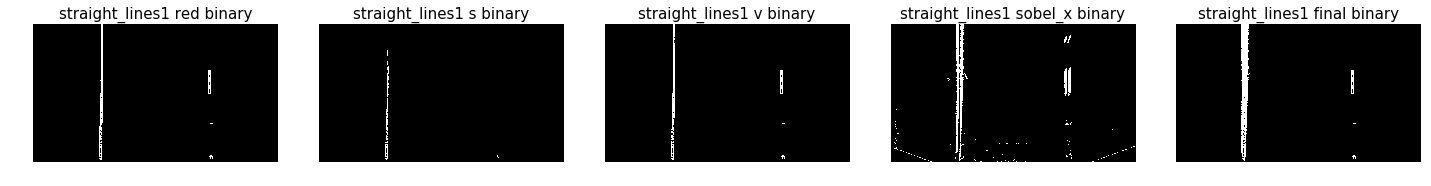

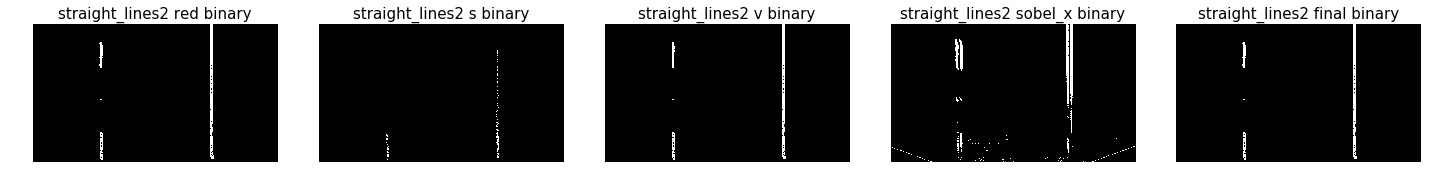

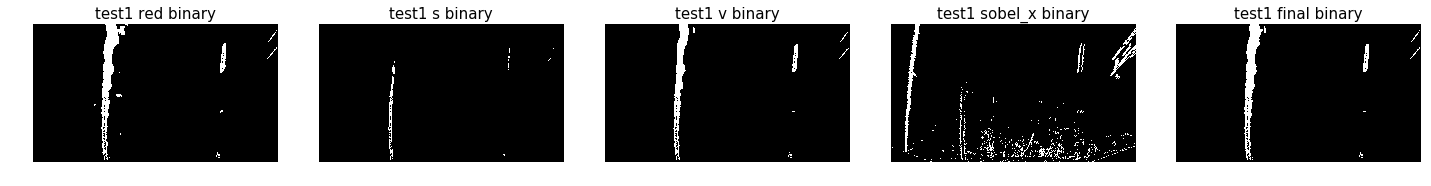

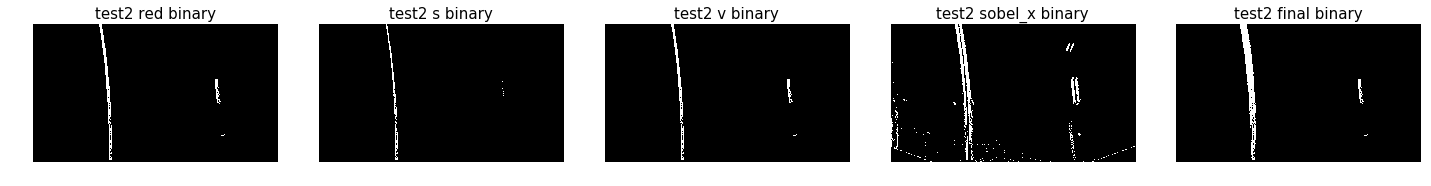

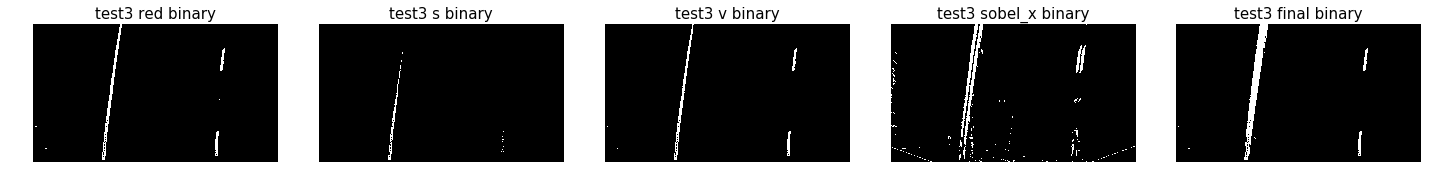

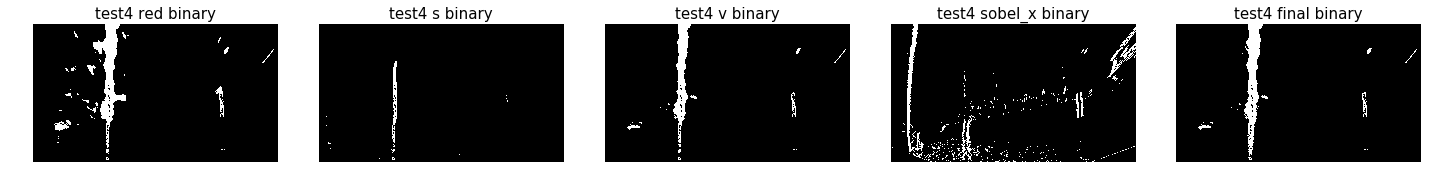

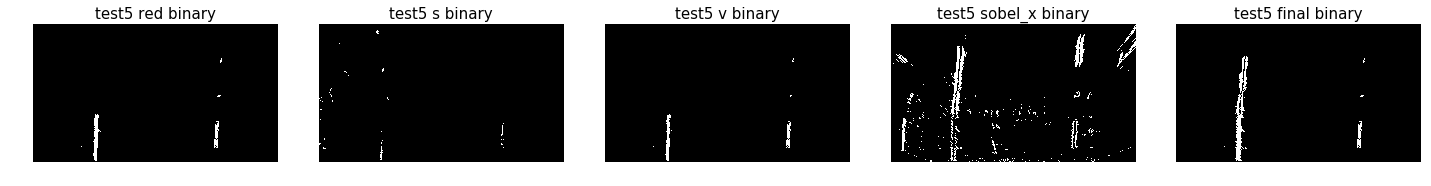

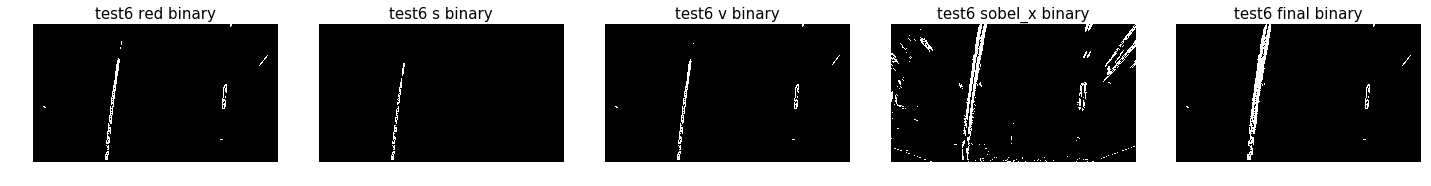

In [13]:
def BinaryPipeLine(raw_img,mtx,dist,M, final_only = False):
    '''
    raw_img: the original distorted image
    mtx, dist: the matrix for camera distortion clibration
    M: matrix to convert undistorted image into warp view
    '''
    img_size = (raw_img.shape[1], raw_img.shape[0])
    #convert raw_img into undisted view
    undist_img= cv2.undistort(raw_img, mtx, dist, None, mtx)
    #genrate bird eye's view
    warped_img = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    
    #RGB
    sobel_kernel = 3    
    thresh_R_low = 215
    thresh_R_high = 255
    red_RGB = warped_img[:,:,0]
    red_binary = np.zeros_like(red_RGB)
    red_binary[(red_RGB>thresh_R_low)&(red_RGB<thresh_R_high)]=1  
    #HLS
    thresh_S_low = 210
    thresh_S_high = 255
    hls = cv2.cvtColor(warped_img, cv2.COLOR_RGB2HLS)        
    s_hls = hls[:,:,2]
    s_binary = np.zeros_like(s_hls)
    s_binary[(s_hls>thresh_S_low)&(s_hls<thresh_S_high)]=1
    #HSV
    thresh_V_low = 220
    thresh_V_high = 255
    hsv = cv2.cvtColor(warped_img, cv2.COLOR_RGB2HSV)        
    v_hsv = hsv[:,:,2]
    v_binary = np.zeros_like(v_hsv )
    v_binary[(v_hsv>thresh_V_low)&(v_hsv<thresh_V_high)]=1
    #LUV,
    thresh_LUV_low = 155
    thresh_LUV_high = 255
    luv = cv2.cvtColor(warped_img, cv2.COLOR_RGB2LUV)        
    v_luv = luv[:,:,2]
    luv_binary = np.zeros_like(v_luv )
    luv_binary[(v_luv>thresh_LUV_low)&(v_hsv<thresh_LUV_high)]=1    
    #X,Y,and mag gradient
    thresh_x_low = 14
    thresh_x_high = 100
    gray = warped_img[:,:,0]
    sobel= cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    abs_sobel = np.absolute(sobel)
    scaled_sobel = np.uint8(255  * abs_sobel / np.max(abs_sobel))                            
    sobel_binary = np.zeros_like(scaled_sobel)
    sobel_binary[(scaled_sobel>thresh_x_low)&(scaled_sobel<thresh_x_high)]=1
    #combination of RGB, HLS, HSV, LUV and gradient into final binary image
    final_binary = np.zeros_like(gray)
    #final_binary[(red_binary==1) | (s_binary==1) | (v_binary==1) | (sobel_binary==1)] = 1
    final_binary +=red_binary
    final_binary +=s_binary
    final_binary +=v_binary
    final_binary +=luv_binary    
    final_binary +=sobel_binary
    final_binary[final_binary<=1]=0
    final_binary[final_binary>0]=1    
    if final_only:
        return final_binary
    return red_binary, s_binary, v_binary, sobel_binary, final_binary
    
imgs_name = glob.glob('test_images\*.jpg')
for i, img_name in enumerate(imgs_name):
    test_img = mpimg.imread(img_name)
    name = img_name.split('\\')[-1].split('.')[0]
    red_binary, s_binary, v_binary, sobel_binary, final_binary  = BinaryPipeLine(test_img,mtx,dist,M)
    
    fig, *axs = plt.subplots(1,5,figsize=(20,5  ))
    axs = np.ravel(axs)
    fig.tight_layout()
    axs[0].imshow(red_binary,cmap='gray')
    axs[0].axis('off')
    axs[0].set_title(name+' red binary', fontsize = 15)
    mpimg.imsave('output_images\\'+name+'R_RGB.jpg',red_binary,cmap='gray')    
    axs[1].imshow(s_binary,cmap='gray')
    axs[1].axis('off')
    axs[1].set_title(name+' s binary', fontsize = 15)
    mpimg.imsave('output_images\\'+name+'S_HLS.jpg',s_binary,cmap='gray')      
    axs[2].imshow(v_binary,cmap='gray')
    axs[2].axis('off')
    axs[2].set_title(name+' v binary', fontsize = 15)
    mpimg.imsave('output_images\\'+name+'V_HSV.jpg',v_binary,cmap='gray')      
    
    axs[3].imshow(sobel_binary,cmap='gray')
    axs[3].axis('off')
    axs[3].set_title(name+' sobel_x binary', fontsize = 15)
    mpimg.imsave('output_images\\'+name+'X_Gradient.jpg',sobel_binary,cmap='gray')          
    axs[4].imshow(final_binary,cmap='gray')
    axs[4].axis('off')
    axs[4].set_title(name+' final binary', fontsize = 15)
    mpimg.imsave('output_images\\'+name+'_binary.jpg',final_binary,cmap='gray')

In [14]:
my_per_pix = 30/ 720
mx_per_pix = 3.7/ 700

def find_lane_pixels(binary_warped):
    '''
    this function is take bird's eye view image and find those pixels belong to left and righ lanes
    inptus:
    binary_warped is the bird's eye view of image in gray 
    outputs:
    leftx, lefty: the coordinates of left lane pixels 
    rightx, righty: the coordinates of right lane pixels 
    out_img: the input image 'binary_warped' with lane pixels search rectanguler
    '''
    # Take a histogram of the bottom half of the image
    histogram = np.sum(binary_warped[binary_warped.shape[0]//2:,:], axis=0)
    # Create an output image to draw on and visualize the lane lines
    out_img = np.dstack((binary_warped, binary_warped, binary_warped))
    # Find the peak of the left and right halves of the histogram
    # These will be the starting point for the left and right lines
    midpoint = np.int(histogram.shape[0]//2)
    leftx_base = np.argmax(histogram[:midpoint])
    rightx_base = np.argmax(histogram[midpoint:]) + midpoint

    # HYPERPARAMETERS
    # Choose the number of sliding windows
    nwindows = 9
    # Set the width of the windows +/- margin
    margin = 100
    # Set minimum number of pixels found to recenter window
    minpix = 50

    # Set height of windows - based on nwindows above and image shape
    window_height = np.int(binary_warped.shape[0]//nwindows)
    # Identify the x and y positions of all nonzero pixels in the image
    nonzero = binary_warped.nonzero()
    nonzeroy = np.array(nonzero[0])
    nonzerox = np.array(nonzero[1])
    # Current positions to be updated later for each window in nwindows
    leftx_current = leftx_base
    rightx_current = rightx_base

    # Create empty lists to receive left and right lane pixel indices
    left_lane_inds = []
    right_lane_inds = []

    # Step through the windows one by one
    for window in range(nwindows):
        # Identify window boundaries in x and y (and right and left)
        win_y_low = binary_warped.shape[0] - (window+1)*window_height
        win_y_high = binary_warped.shape[0] - window*window_height
        win_xleft_low = leftx_current - margin
        win_xleft_high = leftx_current + margin
        win_xright_low = rightx_current - margin
        win_xright_high = rightx_current + margin
        
        # Draw the windows on the visualization image
        cv2.rectangle(out_img,(win_xleft_low,win_y_low),
        (win_xleft_high,win_y_high),(0,255,0), 2) 
        cv2.rectangle(out_img,(win_xright_low,win_y_low),
        (win_xright_high,win_y_high),(0,255,0), 2) 
        
        # Identify the nonzero pixels in x and y within the window #
        good_left_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xleft_low) &  (nonzerox < win_xleft_high)).nonzero()[0]
        good_right_inds = ((nonzeroy >= win_y_low) & (nonzeroy < win_y_high) & 
        (nonzerox >= win_xright_low) &  (nonzerox < win_xright_high)).nonzero()[0]
        
        # Append these indices to the lists
        left_lane_inds.append(good_left_inds)
        right_lane_inds.append(good_right_inds)
        
        # If you found > minpix pixels, recenter next window on their mean position
        if len(good_left_inds) > minpix:
            leftx_current = np.int(np.mean(nonzerox[good_left_inds]))
        if len(good_right_inds) > minpix:        
            rightx_current = np.int(np.mean(nonzerox[good_right_inds]))

    # Concatenate the arrays of indices (previously was a list of lists of pixels)
    try:
        left_lane_inds = np.concatenate(left_lane_inds)
        right_lane_inds = np.concatenate(right_lane_inds)
    except ValueError:
        # Avoids an error if the above is not implemented fully
        pass

    # Extract left and right line pixel positions
    leftx = nonzerox[left_lane_inds]
    lefty = nonzeroy[left_lane_inds] 
    rightx = nonzerox[right_lane_inds]
    righty = nonzeroy[right_lane_inds]

    return leftx, lefty, rightx, righty, out_img


def fit_polynomial(binary_warped):
    '''
    This function is to find the second order function to fit the left/right lane pixels
    binary_warped is the bird's eye view of image in gray 
    return values:
    pts_left: the left lane pixels 
    pts_right: the right lane pixels 
    out_img: the input image 'binary_warped' with lane pixels search rectanguler
    curverad: the lane curvature values
    '''
    # Find our lane pixels first
    leftx, lefty, rightx, righty, out_img = find_lane_pixels(binary_warped)

    # Fit a second order polynomial to each using `np.polyfit`
    left_fit = np.polyfit(lefty, leftx, 2)
    right_fit = np.polyfit(righty, rightx, 2)

    # Generate x and y values for plotting
    ploty = np.linspace(0, binary_warped.shape[0]-1, binary_warped.shape[0] )
    try:
        left_fitx = left_fit[0]*ploty**2 + left_fit[1]*ploty + left_fit[2]
        right_fitx = right_fit[0]*ploty**2 + right_fit[1]*ploty + right_fit[2]    
    except TypeError:
        # Avoids an error if `left` and `right_fit` are still none or incorrect
        print('The function failed to fit a line!')
        left_fitx = 1*ploty**2 + 1*ploty
        right_fitx = 1*ploty**2 + 1*ploty
    ## Visualization ##
    # Colors in the left and right lane regions
    out_img[lefty, leftx] = [255, 0, 0]
    out_img[righty, rightx] = [0, 0, 255]
    
    #curvature calculation:   
    left_fit_cr_0 = mx_per_pix / my_per_pix**2 * left_fit[0]
    left_fit_cr_1 = mx_per_pix / my_per_pix * left_fit[1]
    right_fit_cr_0 = mx_per_pix / my_per_pix**2 * right_fit[0]
    right_fit_cr_1 = mx_per_pix / my_per_pix * right_fit[1]    
    
    y_eval = max(ploty)
    
    left_curverad = ((1 + (2*left_fit_cr_0*y_eval*my_per_pix + left_fit_cr_1)**2)**1.5) / np.absolute(2*left_fit_cr_0)
    right_curverad = ((1 + (2*right_fit_cr_0*y_eval*my_per_pix + right_fit_cr_1)**2)**1.5) / np.absolute(2*right_fit_cr_0)
    
    curverad = np.average([left_curverad,right_curverad])
    
    pts_left = np.array([np.transpose(np.vstack([left_fitx, ploty]))])

    cv2.polylines(out_img, np.int32([pts_left]), isClosed=False, color=(255,255,0), thickness=3)    

    pts_right = np.array([np.flipud(np.transpose(np.vstack([right_fitx, ploty])))])    
    cv2.polylines(out_img, np.int32([pts_right]), isClosed=False, color=(255,255,0), thickness=3)
    #pts = np.hstack((pts_left, pts_right))
    #cv2.fillPoly(out_img, np.int_([pts]), (155,255,155))   
    return pts_left, pts_right, out_img, curverad



In [15]:
def draw_lane_lines_on_undist_img(raw_img):
    '''
    the functionis to draw lane lines to the undistored image
    input:
        raw_img: image before camera calibration
    output:
        result: image's with lane lines, this image is without camera calibration
    '''
    raw_img = raw_img[:,:,:3]
    img_size = (raw_img.shape[0], raw_img.shape[1])

    undist_img= cv2.undistort(raw_img, mtx, dist, None, mtx)
    #warped_img = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = BinaryPipeLine(raw_img,mtx,dist,M, final_only = True)    
    #out_img = fit_polynomial(binary_warped)
    pts_left, pts_right,_,_ = fit_polynomial(binary_warped)    
    
    lane_lines = np.zeros(img_size).astype(np.uint8)   
    lane_lines = np.dstack((lane_lines, lane_lines, lane_lines))
        
    cv2.polylines(lane_lines, np.int32([pts_left]), isClosed=False, color=(255,255,0), thickness=3)    
    cv2.polylines(lane_lines, np.int32([pts_right]), isClosed=False, color=(255,255,0), thickness=3)
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(lane_lines, np.int_([pts]), (155,255,155))   
    img_size = (raw_img.shape[1], raw_img.shape[0])
    lane_lines_unwarped =  cv2.warpPerspective(lane_lines, Minv, img_size, flags=cv2.INTER_NEAREST)
    result = cv2.addWeighted(undist_img, 1,lane_lines_unwarped, 0.2, 0)    
    return result
def draw_lane_lines_on_warped_img(raw_img):
    '''
    the functionis to draw lane lines to the bird's eye view image
    input:
        raw_img: image before camera calibration
    output:
        result: image's with lane lines, this image is bird's eye view version
    '''
    raw_img = raw_img[:,:,:3]
    img_size = (raw_img.shape[1], raw_img.shape[0])

    undist_img= cv2.undistort(raw_img, mtx, dist, None, mtx)
    warped_img = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = BinaryPipeLine(raw_img,mtx,dist,M, final_only = True)    
    #out_img = fit_polynomial(binary_warped)
    
    img_size = (raw_img.shape[0], raw_img.shape[1])
    pts_left, pts_right,_,_ = fit_polynomial(binary_warped)    
    
    lane_lines = np.zeros(img_size).astype(np.uint8)   
    lane_lines = np.dstack((lane_lines, lane_lines, lane_lines))
        
    cv2.polylines(lane_lines, np.int32([pts_left]), isClosed=False, color=(255,255,0), thickness=3)    
    cv2.polylines(lane_lines, np.int32([pts_right]), isClosed=False, color=(255,255,0), thickness=3)
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(lane_lines, np.int_([pts]), (155,255,155))   
    result = cv2.addWeighted(warped_img, 1,lane_lines, 0.2, 0)    
    return result

def draw_lane_lines_on_binary_warped_img(raw_img):
    '''
    the functionis to draw lane lines to the bird's eye view image
    input:
        raw_img: image before camera calibration
    output:
        result: image's with lane lines, this image is bird's eye view version in gray color
    '''
    raw_img = raw_img[:,:,:3]
    img_size = (raw_img.shape[1], raw_img.shape[0])

    undist_img= cv2.undistort(raw_img, mtx, dist, None, mtx)
    warped_img = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = BinaryPipeLine(raw_img,mtx,dist,M, final_only = True)    
    #out_img = fit_polynomial(binary_warped)
    img_size = (raw_img.shape[0], raw_img.shape[1])
    _, _,out_img,_ = fit_polynomial(binary_warped)    
   
    return out_img

def combine_undist_warped_binary_img(raw_img):
    raw_img = raw_img[:,:,:3]
    img_size = (raw_img.shape[1], raw_img.shape[0])

    undist_img= cv2.undistort(raw_img, mtx, dist, None, mtx)
    warped_img = cv2.warpPerspective(undist_img, M, img_size, flags=cv2.INTER_LINEAR)
    binary_warped = BinaryPipeLine(raw_img,mtx,dist,M, final_only = True)    
    #out_img = fit_polynomial(binary_warped)
    
    img_size = (raw_img.shape[0], raw_img.shape[1])
    pts_left, pts_right,binary_img,curverad = fit_polynomial(binary_warped)  
    #put curvature text
    text = 'Lane Curvature: ' + '{:.3f}'.format(curverad) + 'm'
    cv2.putText(undist_img,text,(undist_img.shape[1]//2-200, 50), cv2.FONT_HERSHEY_SIMPLEX, 0.8,  (200,100,10),  2 )
    
    lane_lines = np.zeros(img_size).astype(np.uint8)   
    lane_lines = np.dstack((lane_lines, lane_lines, lane_lines))
        
    cv2.polylines(lane_lines, np.int32([pts_left]), isClosed=False, color=(255,255,0), thickness=3)    
    cv2.polylines(lane_lines, np.int32([pts_right]), isClosed=False, color=(255,255,0), thickness=3)
    pts = np.hstack((pts_left, pts_right))
    cv2.fillPoly(lane_lines, np.int_([pts]), (155,255,155))   
    warped_img = cv2.addWeighted(warped_img, 1,lane_lines, 0.2, 0)   
    
    img_size = (raw_img.shape[1], raw_img.shape[0])
    lane_lines_unwarped =  cv2.warpPerspective(lane_lines, Minv, img_size, flags=cv2.INTER_NEAREST)
    undist_img = cv2.addWeighted(undist_img, 1,lane_lines_unwarped, 0.2, 0)        
    
    warped = cv2.resize(warped_img, (warped_img.shape[1]//3,warped_img.shape[0]//3))


    binary = cv2.resize(binary_img, (binary_img.shape[1]//3,binary_img.shape[0]//3))     
    undist_img[0:warped.shape[0],0:warped.shape[1]] = warped
    undist_img[0:binary.shape[0],(undist.shape[1] - binary.shape[1]):] = binary    
    return undist_img    


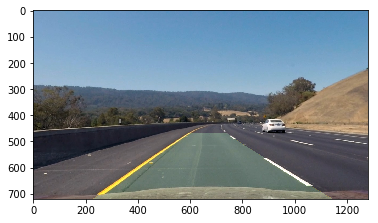

In [16]:
# Load our image
raw_img= mpimg.imread('test_images/test3.jpg')[:,:,:3]
result = draw_lane_lines_on_undist_img(raw_img)
plt.imshow(result)

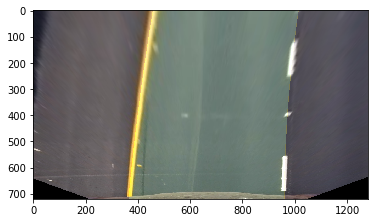

In [17]:
# Load our image
raw_img= mpimg.imread('test_images/test3.jpg')[:,:,:3]
result = draw_lane_lines_on_warped_img(raw_img)
plt.imshow(result)

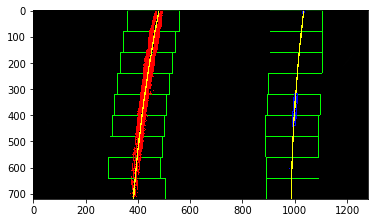

In [18]:
# Load our image
raw_img= mpimg.imread('test_images/test6.jpg')[:,:,:3]
result = draw_lane_lines_on_binary_warped_img(raw_img)
plt.imshow(result)
mpimg.imsave('output_images/'+'curve_fit', result)

In [19]:

def undist_video_pipeline(img):
    frame = np.copy(img)
    result = draw_lane_lines_on_undist_img(frame)
    return result
def warped_video_pipeline(img):
    frame = np.copy(img)
    result = draw_lane_lines_on_warped_img(frame)
    return result
def binary_warped_video_pipeline(img):
    frame = np.copy(img)
    result = draw_lane_lines_on_binary_warped_img(frame)
    return result
def merged_img_pipeline(img):
    frame = np.copy(img)
    result = combine_undist_warped_binary_img(frame)
    return result    

In [20]:
def undist_warped_binary_video(img):
    frame = np.copy(img)
    undist = draw_lane_lines_on_undist_img(frame)
    warped = draw_lane_lines_on_warped_img(undist)
    binary = draw_lane_lines_on_binary_warped_img(undist)  
    #print(warped.shape)    
    warped = cv2.resize(warped, (warped.shape[1]//3,warped.shape[0]//3))


    binary = cv2.resize(binary, (binary.shape[1]//3,binary.shape[0]//3))     
    undist[0:warped.shape[0],0:warped.shape[1]] = warped
    undist[0:binary.shape[0],(undist.shape[1] - binary.shape[1]):] = binary    
    return undist

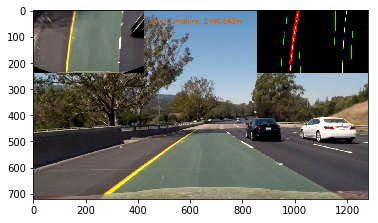

In [21]:
out_img = mpimg.imread('test_images/test6.jpg')[:,:,:3]

result = merged_img_pipeline(out_img)

plt.imshow(result)
mpimg.imsave('output_images/'+'lane_area', result)

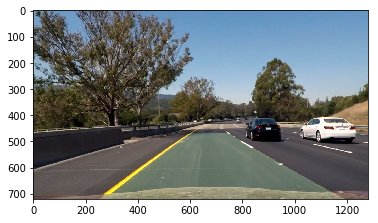

In [22]:
out_img = mpimg.imread('test_images/test6.jpg')
result = undist_video_pipeline(out_img)
plt.imshow(result)

In [23]:
output = 'output_videos/undist_project_video.mp4'
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(undist_video_pipeline)
%time clip.write_videofile(output, audio=False)

clip1.reader.close()
clip.reader.close()
#video_clip.audio.reader.close_proc()

[MoviePy] >>>> Building video output_videos/undist_project_video.mp4
[MoviePy] Writing video output_videos/undist_project_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [01:59<00:00, 10.67it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/undist_project_video.mp4 

Wall time: 1min 59s


In [24]:
HTML("""
<video width="480" height="270" controls>
  <source src='output_videos/undist_project_video.mp4'>
</video>
""")

In [25]:
output = 'output_videos/warped_project_video.mp4'
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(warped_video_pipeline)
%time clip.write_videofile(output, audio=False)

clip1.reader.close()
clip.reader.close()

[MoviePy] >>>> Building video output_videos/warped_project_video.mp4
[MoviePy] Writing video output_videos/warped_project_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [02:00<00:00, 10.48it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/warped_project_video.mp4 

Wall time: 2min


In [26]:
HTML("""
<video width="320" height="180" controls>
  <source src='output_videos/warped_project_video.mp4'>
</video>
""")

In [27]:
output = 'output_videos/binary_warped_project_video.mp4'
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(binary_warped_video_pipeline)
%time clip.write_videofile(output, audio=False)

clip1.reader.close()
clip.reader.close()

[MoviePy] >>>> Building video output_videos/binary_warped_project_video.mp4
[MoviePy] Writing video output_videos/binary_warped_project_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [01:46<00:00, 11.83it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/binary_warped_project_video.mp4 

Wall time: 1min 46s


In [28]:
HTML("""
<video width="320" height="180" controls>
  <source src='output_videos/binary_warped_project_video.mp4'>
</video>
""")

In [29]:
output = 'output_videos/final_video.mp4'
clip1 = VideoFileClip('project_video.mp4')
clip = clip1.fl_image(merged_img_pipeline)
%time clip.write_videofile(output, audio=False)

clip1.reader.close()
clip.reader.close()

[MoviePy] >>>> Building video output_videos/final_video.mp4
[MoviePy] Writing video output_videos/final_video.mp4


100%|█████████████████████████████████████████████████████████████████████████████▉| 1260/1261 [02:06<00:00,  9.97it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: output_videos/final_video.mp4 

Wall time: 2min 6s


In [30]:
HTML("""
<video width="480" height="270" controls>
  <source src='output_videos/final_video.mp4'>
</video>
""")